You are working at the bank as a data analyst, your task is to perform a comprehensive statistical analysis
of the "Bank Marketing" dataset. Your analysis should cover various statistics topics, including Descriptive
Statistics, Probability and Distributions.

1. Calculate descriptive statistics and present a summary for relevant variables in the dataset.
Describe the central tendencies and variability in the data. You must justify the choice of the
variables in this point. [0 – 25%]
2. Create two visualisations (e.g., histograms, box plots) to represent the distribution of the numeric
variables that you consider relevant. What patterns can you observe? [0 – 10%]
3. Calculate and interpret probabilities that might affect the success of a marketing campaign. Why
these variables are relevant? [0 -15%]
4. Analyse a subset of the dataset related and calculate a specified probability of success. With this
probability, place a Binomial distribution and explain why this result is important in a banking
marketing campaign. [0 - 20%]
5. Use Normal distribution to explain a main variable. Visualise the data of your variable and
determine whether this could be considered normally distributed or not. [0 – 15%]
6. Present all your results in a form of a report (minimum 1700 words). The report should contain an
executive introduction, body, and conclusion with suggestions for the marketing campaign. [0-15%]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Bank_Mkt_Campaign.csv")

### Index
1. Data overview

2. Data Analysis

> 2.1 Analysis of relative frequencies

> 2.2 Campaign outcome by age

> 2.2.1 Campaign outcome by group of ages

> 2.2.2 Campaign outcome by marital status

### Data overview

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [5]:
df.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [6]:
df.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [7]:
df.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [8]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [9]:
df.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [10]:
df.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [11]:
df.month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [12]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [13]:
pd.unique(df[['default','job','contact','month','poutcome']].values.ravel('K'))

array(['no', 'yes', 'unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown', 'cellular', 'telephone', 'oct',
       'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov', 'sep',
       'mar', 'dec', 'failure', 'other', 'success'], dtype=object)

### Data cleaning

In [14]:
df.replace('unknown', np.nan, inplace=True)

<AxesSubplot:>

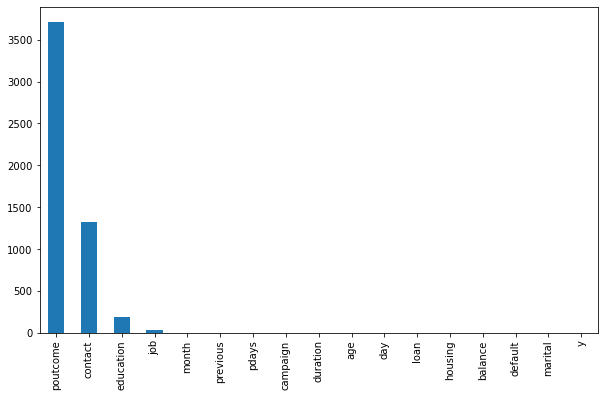

In [15]:
df.isnull().sum().nlargest(20).plot(kind='bar', figsize=(10, 6))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4483 non-null   object
 2   marital    4521 non-null   object
 3   education  4334 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    3197 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   816 non-null    object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Note about previous code
While it may appear insignificant to retain the column 'poutcome' given that we have only gathered data from 816 individuals out of a total of 4521, we have determined that it is still a sufficient sample size to warrant its inclusion in future analyses.

In [17]:
#We are dropping pdays column since we might do not consider relevant to get to know the number of days that passed by after the client was last contacted from a previous campaign
df2=df.drop('pdays',axis=1)
#Last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
df2=df.drop('duration',axis=1)
#We are dropping day column since we might do not consider relevant to get to know the specific day clients were contacted 
df2=df2.drop('day',axis=1)

df2.rename(columns={'default': 'bank_debt',
                    'balance': 'avg_balance',
                    'housing': 'housing_loan',
                    'loan': 'personal_loan',
                    'campaign': 'n_contacts_done',
                    'poutcome':'outcome_prev_campains',
                    'y':'campaign_outcome',
                    'previous':'pre_n_contacts_done'}, inplace=True)

# Convert "success" and "failure" to binary (1 or 0) in "outcome_prev_campains"
# Convert "yes" and "no" to binary (1 or 0) in "bank_debt", "campaign_outcome","outcome_prev_campains","housing_loan","personal_loan"
df2['bank_debt'] = df2['bank_debt'].map({'yes': 1, 'no': 0})
df2['outcome_prev_campains'] = df2['outcome_prev_campains'].map({'success': 1, 'failure': 0,'other':0})
df2['campaign_outcome'] = df2['campaign_outcome'].map({'yes': 1, 'no': 0})
df2['housing_loan'] = df2['housing_loan'].map({'yes': 1, 'no': 0})
df2['personal_loan'] = df2['personal_loan'].map({'yes': 1, 'no': 0})

### Note about previous code
In order to simplify the analysis in the outcome_prev_campains column, we have decided to consider 'other' data values as 'failures', as we could consider 'other' as customers who did not successfully subscribe to a term deposit.

In [18]:
df2.head(10)

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pdays,pre_n_contacts_done,outcome_prev_campains,campaign_outcome
0,30,unemployed,married,primary,0,1787,0,0,cellular,oct,1,-1,0,NaN,0
1,33,services,married,secondary,0,4789,1,1,cellular,may,1,339,4,0.0,0
2,35,management,single,tertiary,0,1350,1,0,cellular,apr,1,330,1,0.0,0
3,30,management,married,tertiary,0,1476,1,1,NaN,jun,4,-1,0,NaN,0
4,59,blue-collar,married,secondary,0,0,1,0,NaN,may,1,-1,0,NaN,0
5,35,management,single,tertiary,0,747,0,0,cellular,feb,2,176,3,0.0,0
6,36,self-employed,married,tertiary,0,307,1,0,cellular,may,1,330,2,0.0,0
7,39,technician,married,secondary,0,147,1,0,cellular,may,2,-1,0,NaN,0
8,41,entrepreneur,married,tertiary,0,221,1,0,NaN,may,2,-1,0,NaN,0
9,43,services,married,primary,0,-88,1,1,cellular,apr,1,147,2,0.0,0


2. Data Analysis

> 2.1 Analysis of relative frequencies

In [19]:
value_counts=df2['age'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'age':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,age,Frequency,relative_frequencies
0,34,231,0.051095
1,32,224,0.049547
2,31,199,0.044017
3,36,188,0.041584
4,33,186,0.041141
...,...,...,...
62,68,2,0.000442
63,87,1,0.000221
64,81,1,0.000221
65,86,1,0.000221


In [20]:
value_counts=df2['campaign_outcome'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'campaign_outcome':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,campaign_outcome,Frequency,relative_frequencies
0,0,4000,0.88476
1,1,521,0.11524


In [21]:
value_counts=df2['month'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'month':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,month,Frequency,relative_frequencies
0,may,1398,0.309224
1,jul,706,0.156160
2,aug,633,0.140013
3,jun,531,0.117452
4,nov,389,0.086043
5,apr,293,0.064809
6,feb,222,0.049104
7,jan,148,0.032736
8,oct,80,0.017695
9,sep,52,0.011502


In [22]:
value_counts=df2['marital'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'marital':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,marital,Frequency,relative_frequencies
0,married,2797,0.618668
1,single,1196,0.264543
2,divorced,528,0.116788


In [23]:
value_counts=df2['job'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'job':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,job,Frequency,relative_frequencies
0,management,969,0.214333
1,blue-collar,946,0.209246
2,technician,768,0.169874
3,admin.,478,0.105729
4,services,417,0.092236
5,retired,230,0.050874
6,self-employed,183,0.040478
7,entrepreneur,168,0.037160
8,unemployed,128,0.028312
9,housemaid,112,0.024773


In [24]:
value_counts=df2['education'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'education':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,education,Frequency,relative_frequencies
0,secondary,2306,0.510064
1,tertiary,1350,0.298607
2,primary,678,0.149967


In [25]:
value_counts=df2['housing_loan'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'housing_loan':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,housing_loan,Frequency,relative_frequencies
0,1,2559,0.566025
1,0,1962,0.433975


In [26]:
value_counts=df2['personal_loan'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'personal_loan':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,personal_loan,Frequency,relative_frequencies
0,0,3830,0.847158
1,1,691,0.152842


In [27]:
value_counts=df2['contact'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'contact':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,contact,Frequency,relative_frequencies
0,cellular,2896,0.640566
1,telephone,301,0.066578


In [28]:
value_counts=df2['outcome_prev_campains'].value_counts()
relative_frequencies=value_counts/len(df2)
subtable=pd.DataFrame({'outcome_prev_campains':value_counts.index,
                      'Frequency':value_counts.values,
                      'relative_frequencies':relative_frequencies.values})
subtable

,outcome_prev_campains,Frequency,relative_frequencies
0,0.0,687,0.151958
1,1.0,129,0.028534


In [29]:
mean_balance=df2['avg_balance'].mean()
print(f"{mean_balance:.2f}")

1422.66


In [30]:
median_balance=df2['avg_balance'].median()
print(f"{median_balance:.2f}")

444.00


In [31]:
mean_age=df2['age'].mean()
print(f"{mean_age:.2f}")

41.17


In [32]:
median_age=df2['age'].median()
print(f"{median_age:.2f}")

39.00


> 2.2 Campaign outcome by features

### Campaign Success

In [33]:
ages_reached=df2.groupby('campaign_outcome',axis=0).count()
ages_reached

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pdays,pre_n_contacts_done,outcome_prev_campains
campaign_outcome,,,,,,,,,,,,,,
0,4000,3969,4000,3832,4000,4000,4000,4000,2737,4000,4000,4000,4000,632
1,521,514,521,502,521,521,521,521,460,521,521,521,521,184


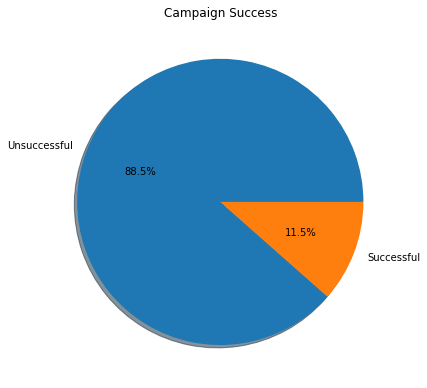

In [34]:
# Assuming you have the counts for 'campaign_outcome'
campaign_outcome_counts = df2['campaign_outcome'].value_counts()

# Define the labels for the pie chart
labels = ['Unsuccessful', 'Successful']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(campaign_outcome_counts, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Campaign Success')
plt.tight_layout()

plt.show()

> 2.2.1 Group of ages outcome

In order to study how sucessful was the campaing by group of ages, we have decided to creat a new column grouping the column 'age' by group of age where young is population from 19 to 34, adult from 35 to 59 and elderly from 60 to 87.

In [35]:
max_age = df2['age'].max()
print("Maximum Age:", max_age)

Maximum Age: 87


In [36]:
min_age = df2['age'].min()
print("Minimum Age:", min_age)

Minimum Age: 19


In [37]:
age_distribution = [19, 35, 60, float('inf')]
age_labels = ['Young', 'Adult', 'Elderly']
df2['age_group'] = pd.cut(df2['age'], bins=age_distribution, labels=age_labels, right=False)

#In order to be able to work with the data we have decided to convert it in numerical data
#df2['age_group'] = df2['age_group'].map({'Young': 0, 'Adult': 1,'Elderly':2})

In [38]:
df2.head()

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pdays,pre_n_contacts_done,outcome_prev_campains,campaign_outcome,age_group
0,30,unemployed,married,primary,0,1787,0,0,cellular,oct,1,-1,0,NaN,0,Young
1,33,services,married,secondary,0,4789,1,1,cellular,may,1,339,4,0.0,0,Young
2,35,management,single,tertiary,0,1350,1,0,cellular,apr,1,330,1,0.0,0,Adult
3,30,management,married,tertiary,0,1476,1,1,NaN,jun,4,-1,0,NaN,0,Young
4,59,blue-collar,married,secondary,0,0,1,0,NaN,may,1,-1,0,NaN,0,Adult


In [39]:
ages_reached=df2.groupby('age_group',axis=0).count()
ages_reached

,age,job,marital,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pdays,pre_n_contacts_done,outcome_prev_campains,campaign_outcome
age_group,,,,,,,,,,,,,,,
Young,1472,1468,1472,1437,1472,1472,1472,1472,1081,1472,1472,1472,1472,257,1472
Adult,2875,2846,2875,2739,2875,2875,2875,2875,1954,2875,2875,2875,2875,508,2875
Elderly,174,169,174,158,174,174,174,174,162,174,174,174,174,51,174


### Group of ages reached

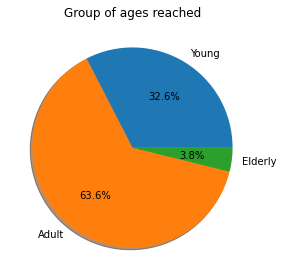

In [40]:
age_group=['Young','Adult','Elderly']
ages_reached['campaign_outcome'].plot(kind='pie', labels=age_group,radius=1,autopct='%1.1f%%', shadow = True)
plt.title('Group of ages reached')
plt.ylabel("")
plt.tight_layout()

> 2.2.2 Campaign outcome by marital status

In [41]:
campaing_performance=df2.groupby('marital',axis=0).count()
campaing_performance

,age,job,education,bank_debt,avg_balance,housing_loan,personal_loan,contact,month,n_contacts_done,pdays,pre_n_contacts_done,outcome_prev_campains,campaign_outcome,age_group
marital,,,,,,,,,,,,,,,
divorced,528,527,504,528,528,528,528,355,528,528,528,528,85,528,528
married,2797,2767,2680,2797,2797,2797,2797,1940,2797,2797,2797,2797,492,2797,2797
single,1196,1189,1150,1196,1196,1196,1196,902,1196,1196,1196,1196,239,1196,1196


In [42]:
df.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

### Marital status reached

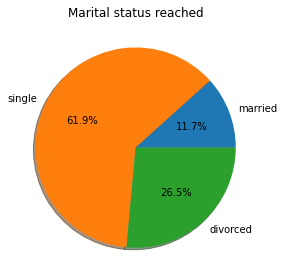

In [44]:
marital_sstatus=['married','single','divorced']
campaing_performance['campaign_outcome'].plot(kind='pie', labels=marital_sstatus,radius=1,autopct='%1.1f%%', shadow = True)
plt.title('Marital status reached')
plt.ylabel("")
plt.tight_layout()

### References

archive.ics.uci.edu. (n.d.). UCI Machine Learning Repository. [online] Available at: https://archive.ics.uci.edu/dataset/222/bank+marketing [Acceesed 05 Nov 2023].

pandas.pydata.org. (n.d.). pandas.cut — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.cut.html [Acceesed 05 Nov 2023].